In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as mgspec
import matplotlib.colors as mcolors
import pandas as pd
import cmocean
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import warnings
import extremespaper as ex
import mplRC
import viz
mplRC.paperRC2()

In [3]:
masks=ex.loadMasks()#'Hawaii','Isla de Mona','Pac. Remote',
siteList=['NE Canyons', 'Steller','Monterey Bay', 'FL Keys', 'La Parg','Samoa', 'Humpback', 'Pac Remote',  'Coral']
for iloc in siteList:
    imask=masks[iloc]
    str0=imask.sitename
    masks[iloc]=imask
    print(masks[iloc].sitename)

Northeast Canyons and Seamounts Marine National Monument
Steller Sea Lion Rookery Buffer Areas
Monterey Bay National Marine Sanctuary
Florida Keys National Marine Sanctuary
La Parguera Natural Reserve
National Marine Sanctuary of American Samoa
Hawaiian Islands Humpback Whale National Marine Sanctuary
Pacific Remote Islands Marine National Monument
Grid Cells Containing Coral


In [6]:
proj=ccrs.Robinson(central_longitude=-150)#-170
lons=viz.lonvec1x1
lats=viz.latvec1x1

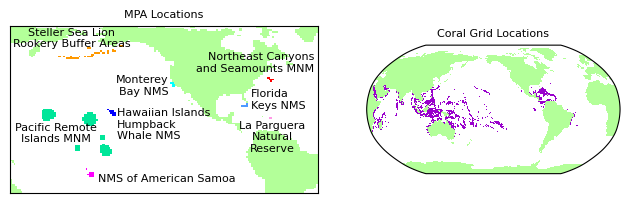

In [7]:
#          NE Can    Steller    Mont     FL        LaParg
colors = [(1, 0, 0), (1,.6,0), (0,1,1), (.3,.6,1), (1,.6,.9),
          (1,0,1), (0,0,1), (0,.9,.6), (.6,0,.8), (.7,1,.6)]  # R -> G -> B
#          Samoa     Hump      PacR      Coral       Land
cmap_name = 'segs'
nbin=10
cm1 = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=nbin)

basemask=np.zeros(np.shape(imask.mask))
basemask2=basemask.copy()
for ind,el in enumerate(siteList):
    if not el=='Coral':
        basemask=basemask+(ind+1)*np.where(viz.deptho1x1.mask,0,masks[el].mask)
    else:
        basemask2=basemask2+(ind+1)*np.where(viz.deptho1x1.mask,0,masks[el].mask)
basemask=basemask+(ind+2)*(viz.deptho1x1.mask.astype(int))
basemask2=basemask2+(ind+2)*(viz.deptho1x1.mask.astype(int))
out=np.ma.masked_where((~viz.deptho1x1.mask)&(basemask<1),basemask)
out2=np.ma.masked_where((~viz.deptho1x1.mask)&(basemask2<1),basemask2)

fig,axi=plt.subplots(1,2,figsize=(8.5,4),gridspec_kw={'width_ratios':[1.6,1],'wspace':0,},
                                                      subplot_kw={'projection':proj})
ax=viz.ax_repl(fig,axi[0])
ax.pcolormesh(out,cmap=cm1,vmin=0.5,vmax=10.5)
ax.set_xlim(145,320)
ax.set_ylim(65,160)
ax.set_aspect(1)
#ax.set_xticks([])
#ax.set_yticks([])
ax.text(180,153,'Steller Sea Lion\nRookery Buffer Areas',ha='center',va='center',fontsize=8)
ax.text(318,139,'Northeast Canyons\nand Seamounts MNM',ha='right',va='center')
ax.text(235,126,'Monterey\nBay NMS',ha='right',va='center')
ax.text(282,118,'Florida\nKeys NMS',ha='left',va='center')
ax.text(294,97,'La Parguera\nNatural\nReserve',ha='center',va='center')
ax.text(195,73,'NMS of American Samoa',ha='left',va='center')
ax.text(206,104,'Hawaiian Islands\nHumpback\nWhale NMS',ha='left',va='center')
ax.text(171,99,'Pacific Remote\nIslands MNM',ha='center',va='center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('MPA Locations')
axi[1].pcolormesh(lons,lats,out2,cmap=cm1,transform=ccrs.PlateCarree(),vmin=0.5,vmax=10.5)
axi[1].set_title('Coral Grid Locations')

fig.savefig(f'sites_MPAs.png',dpi=300,bbox_inches='tight')